Load File

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score

df = pd.read_csv('students_clustering_data.csv')
df

,reading_speed,interaction_time,quiz_accuracy,video_watched_percent,topics_mastered
0,187.450712,403.037396,0.695054,0.927916,7
1,177.926035,387.767042,0.767482,0.903800,7
2,189.715328,287.551793,0.587728,0.926938,2
3,202.845448,348.578548,0.738241,0.853966,11
4,176.487699,332.268797,0.716645,0.908468,7
...,...,...,...,...,...
1255,234.118755,171.123895,0.849648,0.202852,10
1256,224.967928,173.908974,0.783599,0.535274,8
1257,230.444436,198.996885,0.848658,0.441422,7
1258,241.558562,85.249742,0.918080,0.512283,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   reading_speed          1260 non-null   float64
 1   interaction_time       1260 non-null   float64
 2   quiz_accuracy          1260 non-null   float64
 3   video_watched_percent  1260 non-null   float64
 4   topics_mastered        1260 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 49.3 KB


Statistical Analysis

In [8]:
df.describe()

,reading_speed,interaction_time,quiz_accuracy,video_watched_percent,topics_mastered
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,183.744461,349.270916,0.685513,0.634482,5.576190
std,56.121790,194.285396,0.168856,0.223671,3.158217
min,90.955356,53.518284,0.217055,0.088335,0.000000
25%,126.425100,169.297765,0.545806,0.451612,3.000000
50%,180.888292,297.755168,0.715844,0.601914,5.000000
75%,237.956156,562.048797,0.832097,0.869635,8.000000
max,304.458974,766.133539,0.999316,1.059655,16.000000


<Axes: >

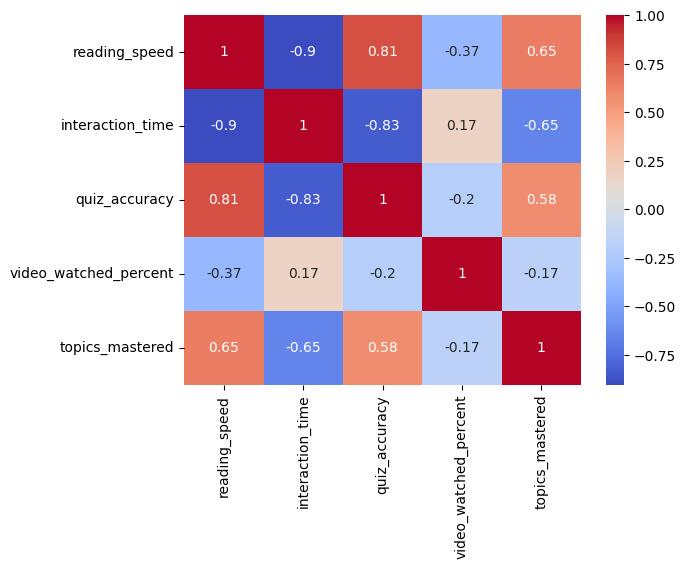

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df.corr()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm') 


Feature Scaling 

In [10]:
scaler = StandardScaler()
students_scaled = scaler.fit_transform(df)

Model Comparison

In [11]:
for i in range(2,10):

    kmeans = KMeans(n_clusters=i)
    kmeans_labels = kmeans.fit_predict(students_scaled)
    kmeans_score = silhouette_score(students_scaled, kmeans_labels)

    
    print(f" k: {i}silhouette_score : {kmeans_score}")




 k: 2silhouette_score : 0.46455548292035437
 k: 3silhouette_score : 0.5533091096209264
 k: 4silhouette_score : 0.45797672788413324
 k: 5silhouette_score : 0.3583382447836973
 k: 6silhouette_score : 0.28544474469486236
 k: 7silhouette_score : 0.24866360225553036
 k: 8silhouette_score : 0.23624019271020474
 k: 9silhouette_score : 0.2585520830109767


In [12]:
for eps in [0.5, 0.6, 0.7,0.9]:            
        dbscan = DBSCAN(eps=eps, min_samples=3)
        dbscan_labels = dbscan.fit_predict(students_scaled)
        dbscan_score = silhouette_score(students_scaled, dbscan_labels)
        print(f" k: {eps} :silhouette_score dbscan_score{dbscan_score}")
        

 k: 0.5 :silhouette_score dbscan_score0.22111435986610342
 k: 0.6 :silhouette_score dbscan_score0.5243843221467808
 k: 0.7 :silhouette_score dbscan_score0.540604431448069
 k: 0.9 :silhouette_score dbscan_score0.5244638844992823


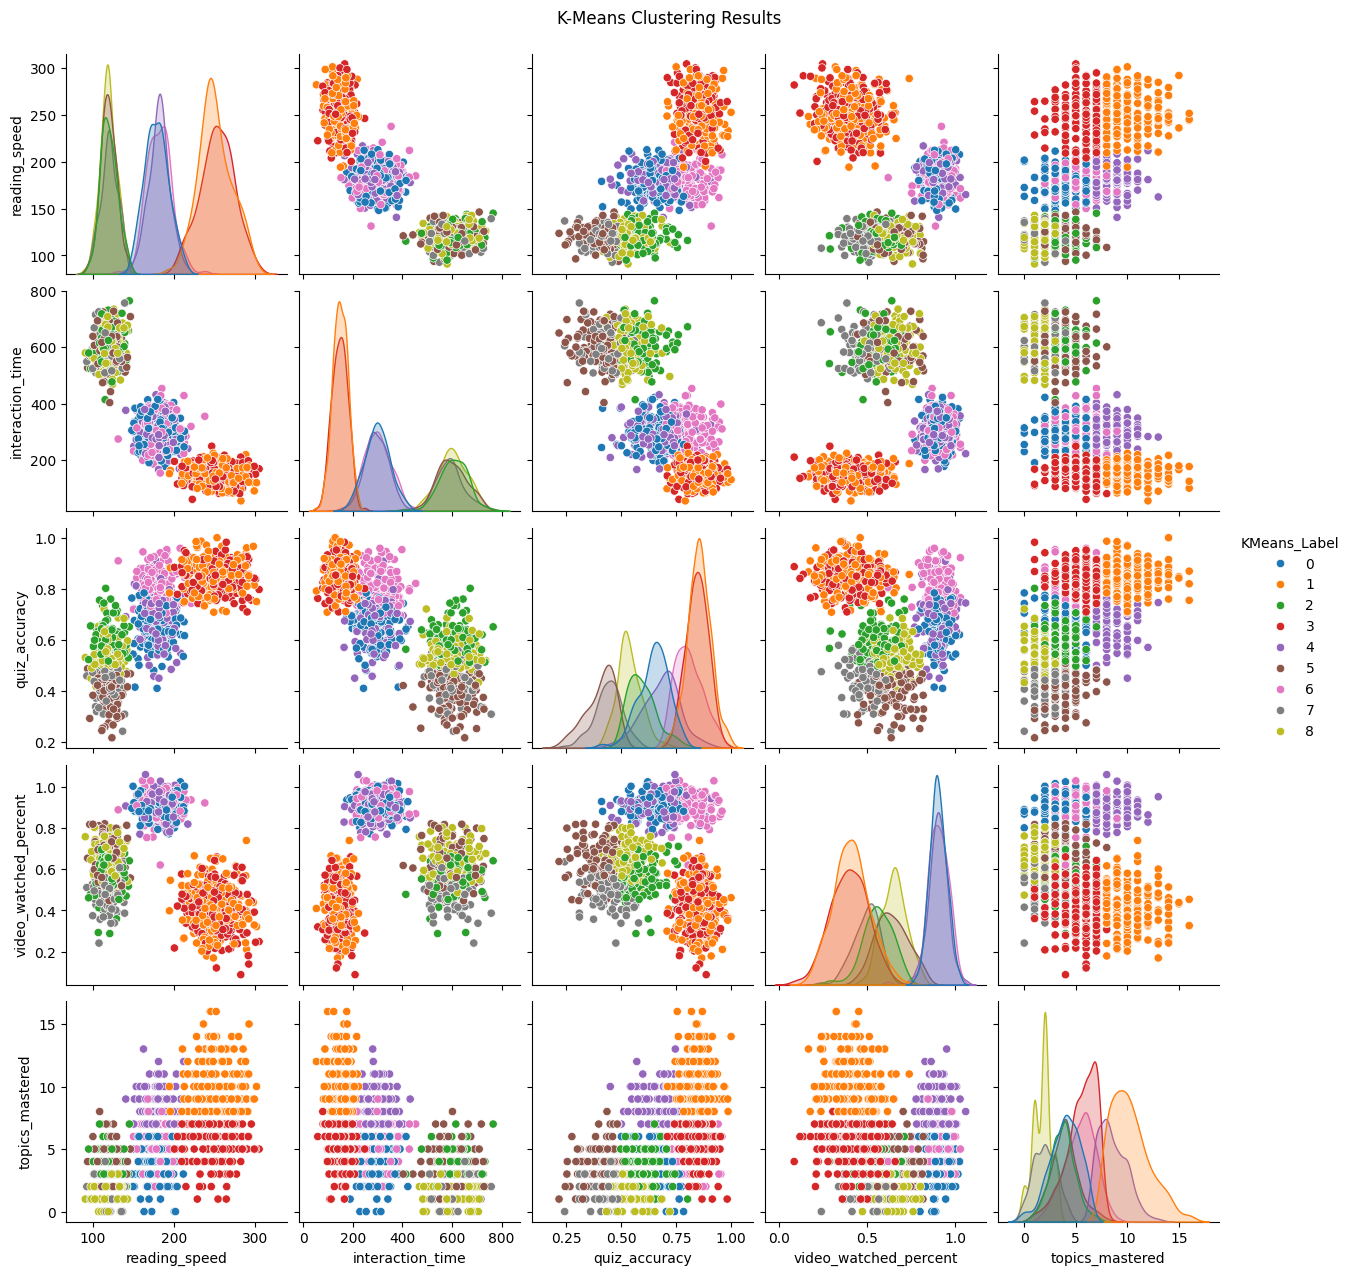

In [ ]:
df['KMeans_Label'] = kmeans_labels
df['DBSCAN_Label'] = dbscan_labels

sns.pairplot(df, hue='KMeans_Label', vars=df.columns[:-2], palette='tab10')
plt.suptitle('K-Means Clustering Results', y=1.02)
plt.show()


Model Training

In [14]:
kmeans = KMeans(n_clusters=3)
df['clustering_label'] = kmeans.fit_predict(students_scaled)


Model Evaluation

In [15]:
kmeans_score = silhouette_score(students_scaled, df['clustering_label'])

print(kmeans_score)


0.5533091096209264


In [29]:
df['clustering_label'].unique()

array([0, 2, 1])

In [30]:
df['clustering_label'] = df['clustering_label'].map({2:"average learner ", 1:"good_learner", 0:"excellent learner"})


In [31]:
df[df['clustering_label']=='excellent learner']

,reading_speed,interaction_time,quiz_accuracy,video_watched_percent,topics_mastered,KMeans_Label,DBSCAN_Label,clustering_label
0,187.450712,403.037396,0.695054,0.927916,7,2,0,excellent learner
1,177.926035,387.767042,0.767482,0.903800,7,2,0,excellent learner
2,189.715328,287.551793,0.587728,0.926938,2,8,0,excellent learner
3,202.845448,348.578548,0.738241,0.853966,11,2,0,excellent learner
4,176.487699,332.268797,0.716645,0.908468,7,2,0,excellent learner
...,...,...,...,...,...,...,...,...
416,203.267280,377.525025,0.867257,0.960858,5,8,0,excellent learner
417,181.735120,250.082298,0.741902,0.976066,10,2,0,excellent learner
418,197.689458,349.216120,0.629499,0.949916,6,2,0,excellent learner
419,181.012777,289.300558,0.694423,0.878419,11,2,0,excellent learner


Deployment

In [32]:
import joblib
model = {
    'scaler': scaler,
    'kmeans': kmeans
}
joblib.dump(model, 'model_clustering.joblib')

['model_clustering.joblib']